# Model Building for Vegetable Disease Prediction

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

## Image Preprocessing using ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1)

In [76]:
x_train = train_datagen.flow_from_directory(r'/content/Veg-dataset/Veg-dataset/train_set',target_size = (128,128), batch_size = 32, class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'/content/Veg-dataset/Veg-dataset/test_set',target_size = (128,128), batch_size = 32, class_mode = 'categorical')

Found 11385 images belonging to 9 classes.
Found 750 images belonging to 9 classes.


## Importing the libraries

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

## Model Building

In [31]:
model = Sequential()

## Adding layers to the model

In [33]:
model.add(Convolution2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'))

In [34]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [35]:
model.add(Flatten())

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 9)                 1359      
                                                        

In [78]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [79]:
model.add(Dense(9, activation = 'softmax'))

## Compiling the model

In [80]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [81]:
len(x_train)

356

In [82]:
len(x_test)

24

## Model Fitting

In [83]:
model.fit(x_train, steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
356/356 [==============================] - 294s 821ms/step - loss: 1.4784 - accuracy: 0.4540 - val_loss: 1.2836 - val_accuracy: 0.7147
Epoch 2/10
356/356 [==============================] - 290s 815ms/step - loss: 1.0785 - accuracy: 0.5955 - val_loss: 1.8063 - val_accuracy: 0.5680
Epoch 3/10
356/356 [==============================] - 289s 809ms/step - loss: 0.8824 - accuracy: 0.6930 - val_loss: 1.8846 - val_accuracy: 0.3880
Epoch 4/10
356/356 [==============================] - 290s 813ms/step - loss: 0.7073 - accuracy: 0.7643 - val_loss: 1.9312 - val_accuracy: 0.3573
Epoch 5/10
356/356 [==============================] - 289s 812ms/step - loss: 0.5931 - accuracy: 0.7980 - val_loss: 1.2552 - val_accuracy: 0.5560
Epoch 6/10
356/356 [==============================] - 289s 812ms/step - loss: 0.5508 - accuracy: 0.8188 - val_loss: 2.1893 - val_accuracy: 0.4853
Epoch 7/10
356/356 [==============================] - 289s 810ms/step - loss: 0.4766 - accuracy: 0.8378 - val_loss: 1.4635 -

## Saving the model

In [86]:
model.save('vegetable.h5')

In [87]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

## Evaluating the model

In [89]:
test_model = load_model("vegetable.h5")

In [91]:
test_img = load_img('/content/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___healthy/b355fbff-bc2c-4266-be05-f6266692c1dd___JR_HL 8410.JPG',target_size = (128,128))

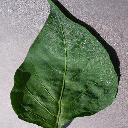

In [92]:
test_img

In [93]:
x = img_to_array(test_img)
x = np.expand_dims(x, axis=0)

In [94]:
predict = np.argmax(test_model.predict(x),axis=1)

1/1 [==============================] - 0s 237ms/step


In [95]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [96]:
index = ['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [97]:
predict[0]

1

In [98]:
index[predict[0]]

'Pepper,_bell___healthy'